1. Problem Formulation
- We want to understand the factors that affect the car prices
- We want to be able to predict car prices based on our data/variables

In [40]:
import os # provides functions for interacting with the operating system
import numpy as np # fundamental package for scientific computing with Python
import pandas as pd # provides high-performance, easy-to-use data structures and data analysis tools
import matplotlib.pyplot as plt # provides a MATLAB-like plotting framework
import seaborn as sns # provides a high-level interface for drawing attractive and informative statistical graphics
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets
from sklearn.metrics import mean_squared_error # Mean squared error regression loss
from sklearn.metrics import r2_score # R^2 (coefficient of determination) regression score function
from sklearn.metrics import mean_absolute_error # Mean absolute error regression loss
from sklearn.metrics import explained_variance_score # Explained variance regression score function
from math import sqrt # Return the square root of x

%matplotlib inline

# Change scientific notation to decimal
pd.options.display.float_format = '{:.2f}'.format

# Increase the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

# View all dataframes
pd.set_option('display.max_columns', None)

# Remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

2. Load the raw data

In [41]:
# Loading the data
raw_data = pd.read_csv('car_price.csv')

# Print the shape of the data
print('Shape of the data: ', raw_data.shape)

# Print the first 5 rows of the data
raw_data.head()

Shape of the data:  (205, 26)


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front      88.60     168.80     64.10   
1  convertible        rwd          front      88.60     168.80     64.10   
2    hatchback        rwd          front      94.50     171.20     65.50   
3        sedan        fwd          front      99.80     176.60     66.20   
4        sedan        4wd          front      99.40     176.60     66.40   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0      48.80        2548       dohc           four         130       mpfi   
1      48.80        2548       dohc           four         130       mpfi   
2      52.40        2823       ohcv            six         152       mpfi   
3      54.30        2337        ohc           four         109       mpfi   
4      54.30        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68              9.00         111     5000       21   
1       3.47    2.68              9.00         111     5000       21   
2       2.68    3.47              9.00         154     5000       19   
3       3.19    3.40             10.00         102     5500       24   
4       3.19    3.40              8.00         115     5500       18   

   highwaympg    price  
0          27 13495.00  
1          27 16500.00  
2          26 16500.00  
3          30 13950.00  
4          22 17450.00

3. Data Preprocessing

- 3.1 EDA(Exploratory Data Analysis)

In [42]:
# Investigate all the elements within each feature

for col in raw_data:
  unique_vals = raw_data[col].unique()
  no_unique_vals = len(unique_vals)
  if no_unique_vals <= 10:
    print('The feature {} has {} unique values: {}'.format(col, no_unique_vals, unique_vals))
  else:
    print('The feature {} has {} unique values'.format(col, no_unique_vals))


The feature car_ID has 205 unique values
The feature symboling has 6 unique values: [ 3  1  2  0 -1 -2]
The feature CarName has 147 unique values
The feature fueltype has 2 unique values: ['gas' 'diesel']
The feature aspiration has 2 unique values: ['std' 'turbo']
The feature doornumber has 2 unique values: ['two' 'four']
The feature carbody has 5 unique values: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
The feature drivewheel has 3 unique values: ['rwd' 'fwd' '4wd']
The feature enginelocation has 2 unique values: ['front' 'rear']
The feature wheelbase has 53 unique values
The feature carlength has 75 unique values
The feature carwidth has 44 unique values
The feature carheight has 49 unique values
The feature curbweight has 171 unique values
The feature enginetype has 7 unique values: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
The feature cylindernumber has 7 unique values: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
The feature enginesize has 44 unique value

3.2 Check for missing values

In [43]:
raw_data.isnull().sum().sort_values(ascending=True)

car_ID              0
citympg             0
peakrpm             0
horsepower          0
compressionratio    0
stroke              0
boreratio           0
fuelsystem          0
enginesize          0
cylindernumber      0
enginetype          0
curbweight          0
carheight           0
carwidth            0
carlength           0
wheelbase           0
enginelocation      0
drivewheel          0
carbody             0
doornumber          0
aspiration          0
fueltype            0
CarName             0
symboling           0
highwaympg          0
price               0
dtype: int64

Ways of dealing with missing data
- Delete the whole observation
- Replace the null value with another value (e.g Mean, rolling mean, last day value, closest day value, mode, median, zero, etc)

In [57]:
# Manually creating null values
# raw_data.loc[raw_data['price'] == '?', 'price'] = np.nan
# raw_data['price2'] = raw_data['price'].replace('?', np.nan)
#  OR change some elements to null
# raw_data['price2'] = raw_data['price']
# raw_data['price2'].iloc[0] = np.nan
# raw_data['price2'].iloc[1] = np.nan
# raw_data['price2'].iloc[2] = np.nan

# Drop the rows with null values
# raw_data = raw_data.dropna(subset=['price2'])

# Or update with the mean value
# raw_data['price2'] = raw_data['price2'].fillna(raw_data['price2'].mean())
# raw_data['price2'][raw_data['price2'].isna()] = raw_data['price2'].mean()

# Drop priec2 column
# raw_data = raw_data.drop('price2', axis=1)
# del raw_data['price2']
# raw_data

RangeIndex(start=203, stop=205, step=1)

3.3 Investigating the numeric values with scattered plots

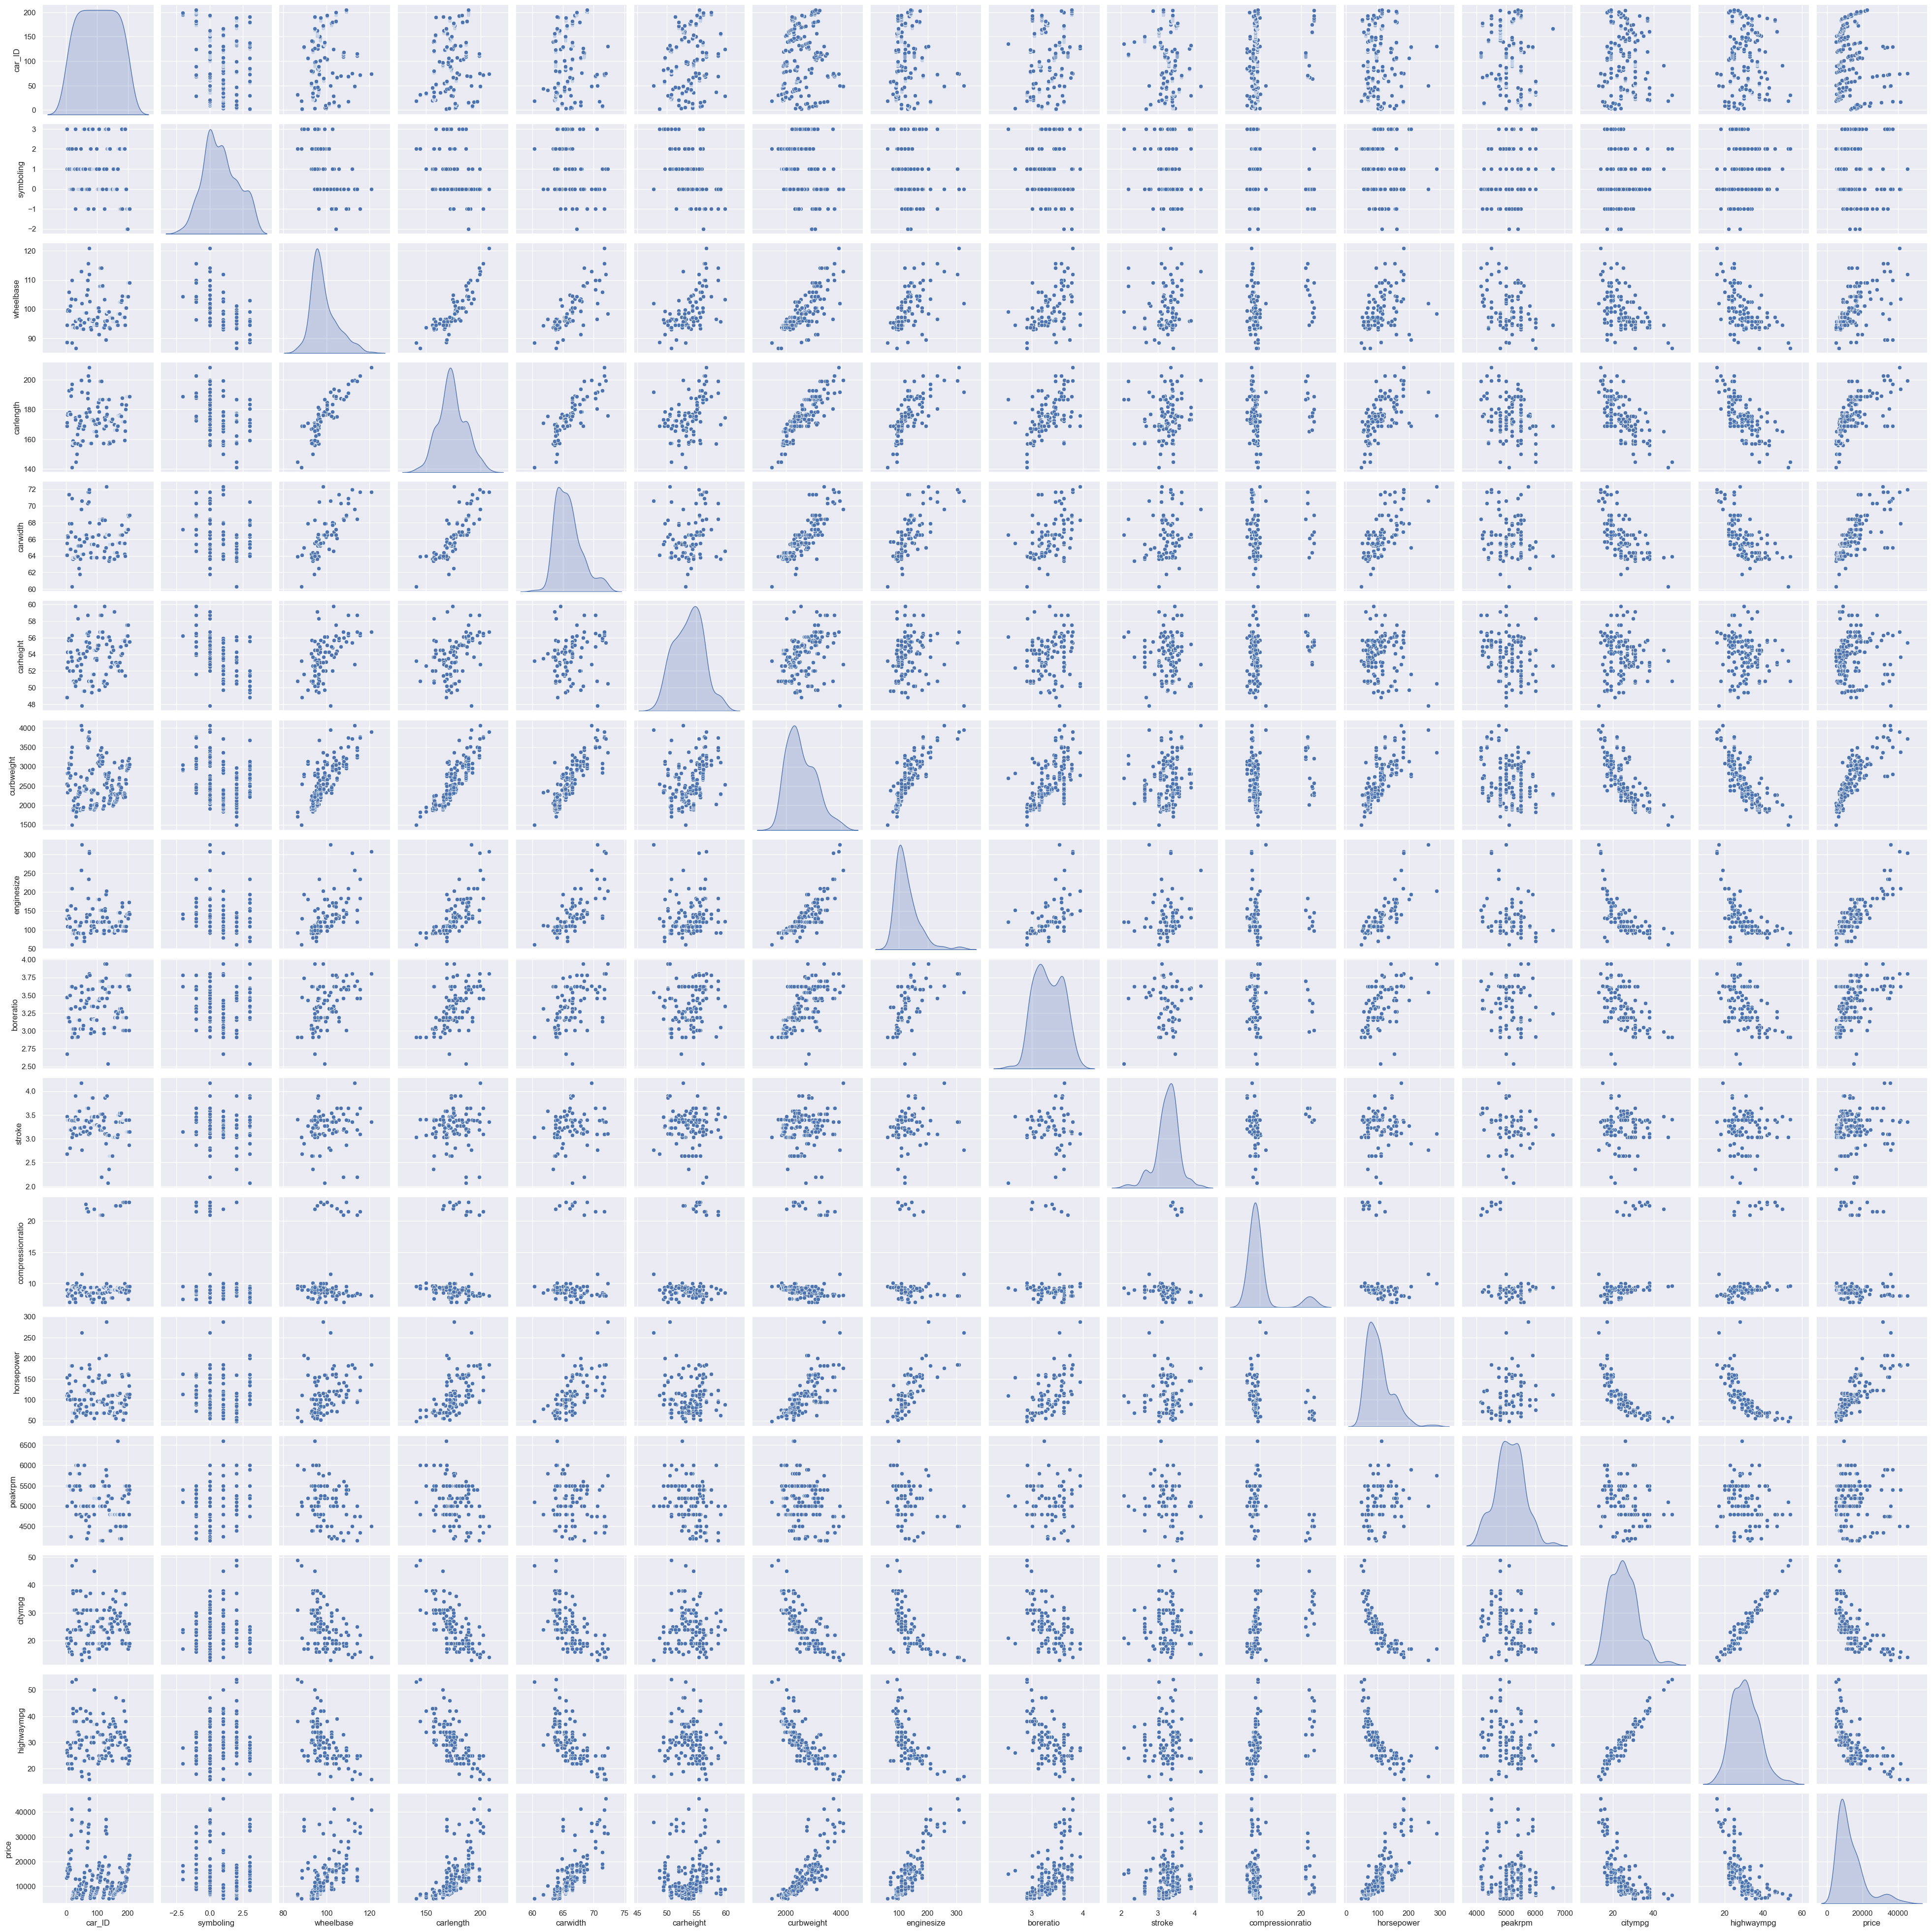

In [62]:
# Example 1: Visualize the data with seaborn pairplot
# Note: Do not use this for large datasets. Filter the columns first
# diag_kind: {‘auto’, ‘hist’, ‘kde’, None} is the method used to plot the data along the diagonal.
# in this case, we use kde (kernel density estimation) to plot the data along the diagonal
g = sns.pairplot(raw_data, diag_kind='kde')

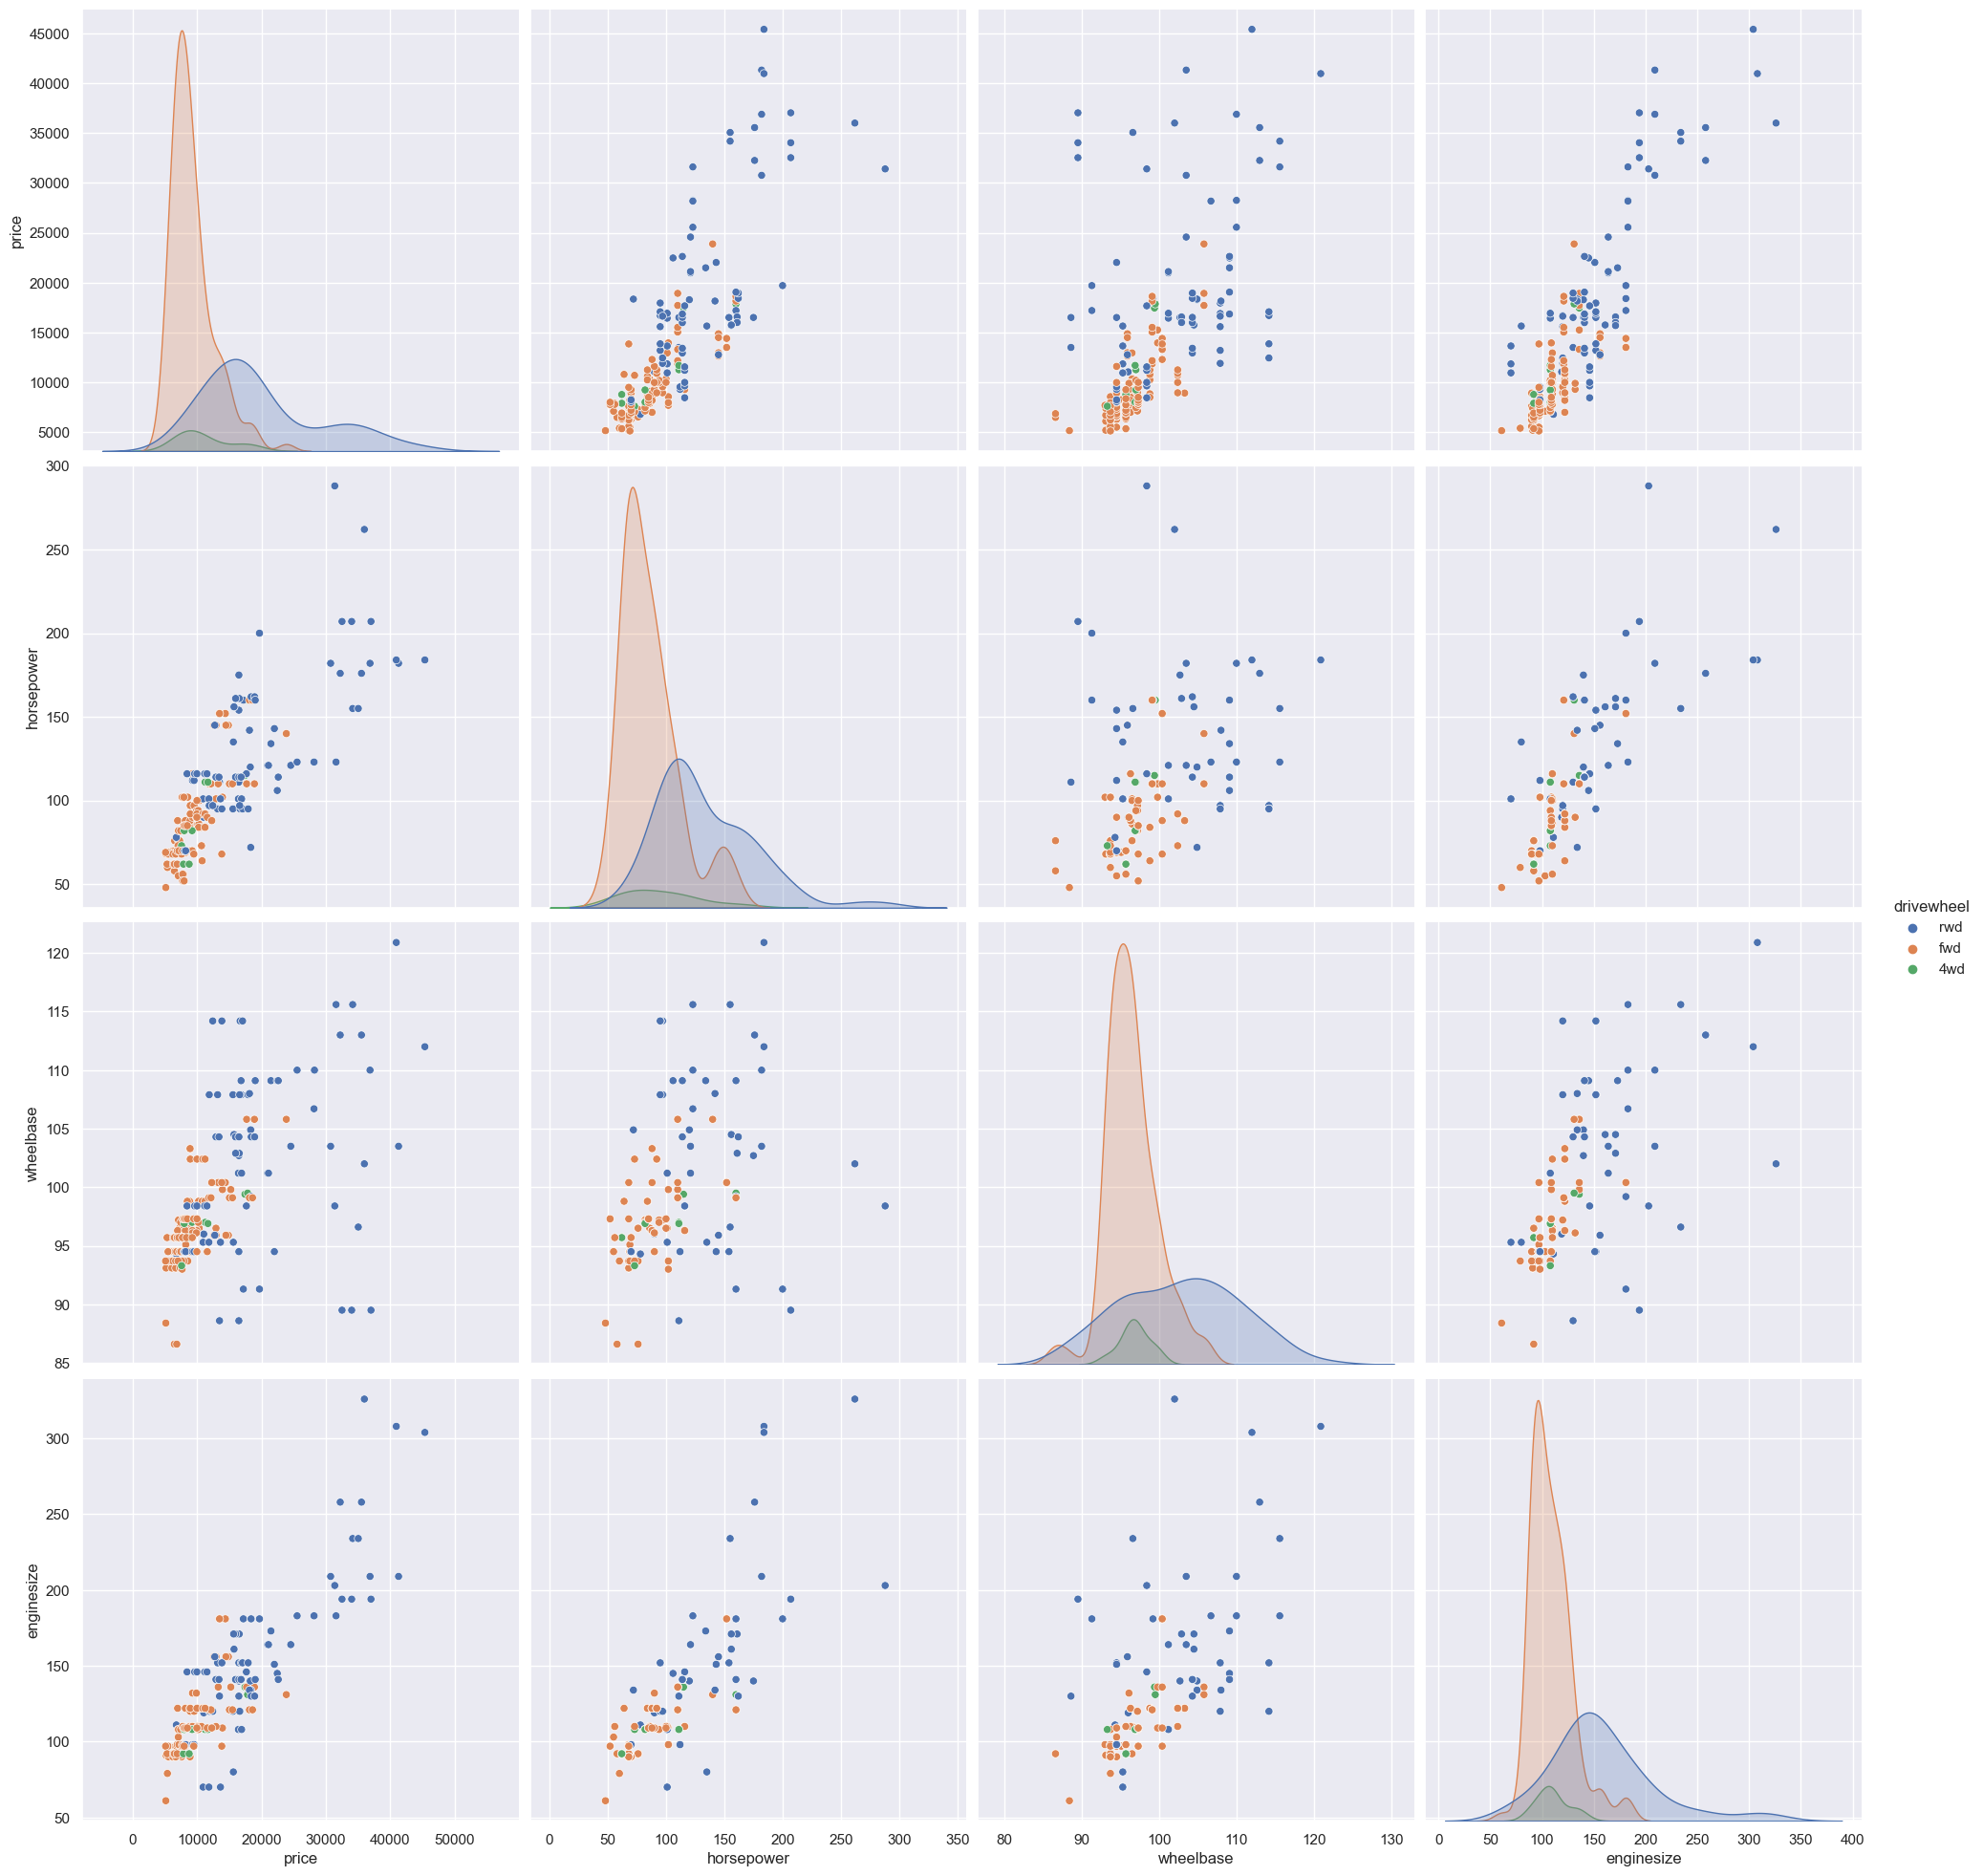

In [60]:
# Example 2: Visualize the data with seaborn pairplot - important features

g = sns.pairplot(raw_data[['price', 'horsepower', 'wheelbase', 'enginesize', 'drivewheel']], hue='drivewheel', height=5, diag_kind='kde')

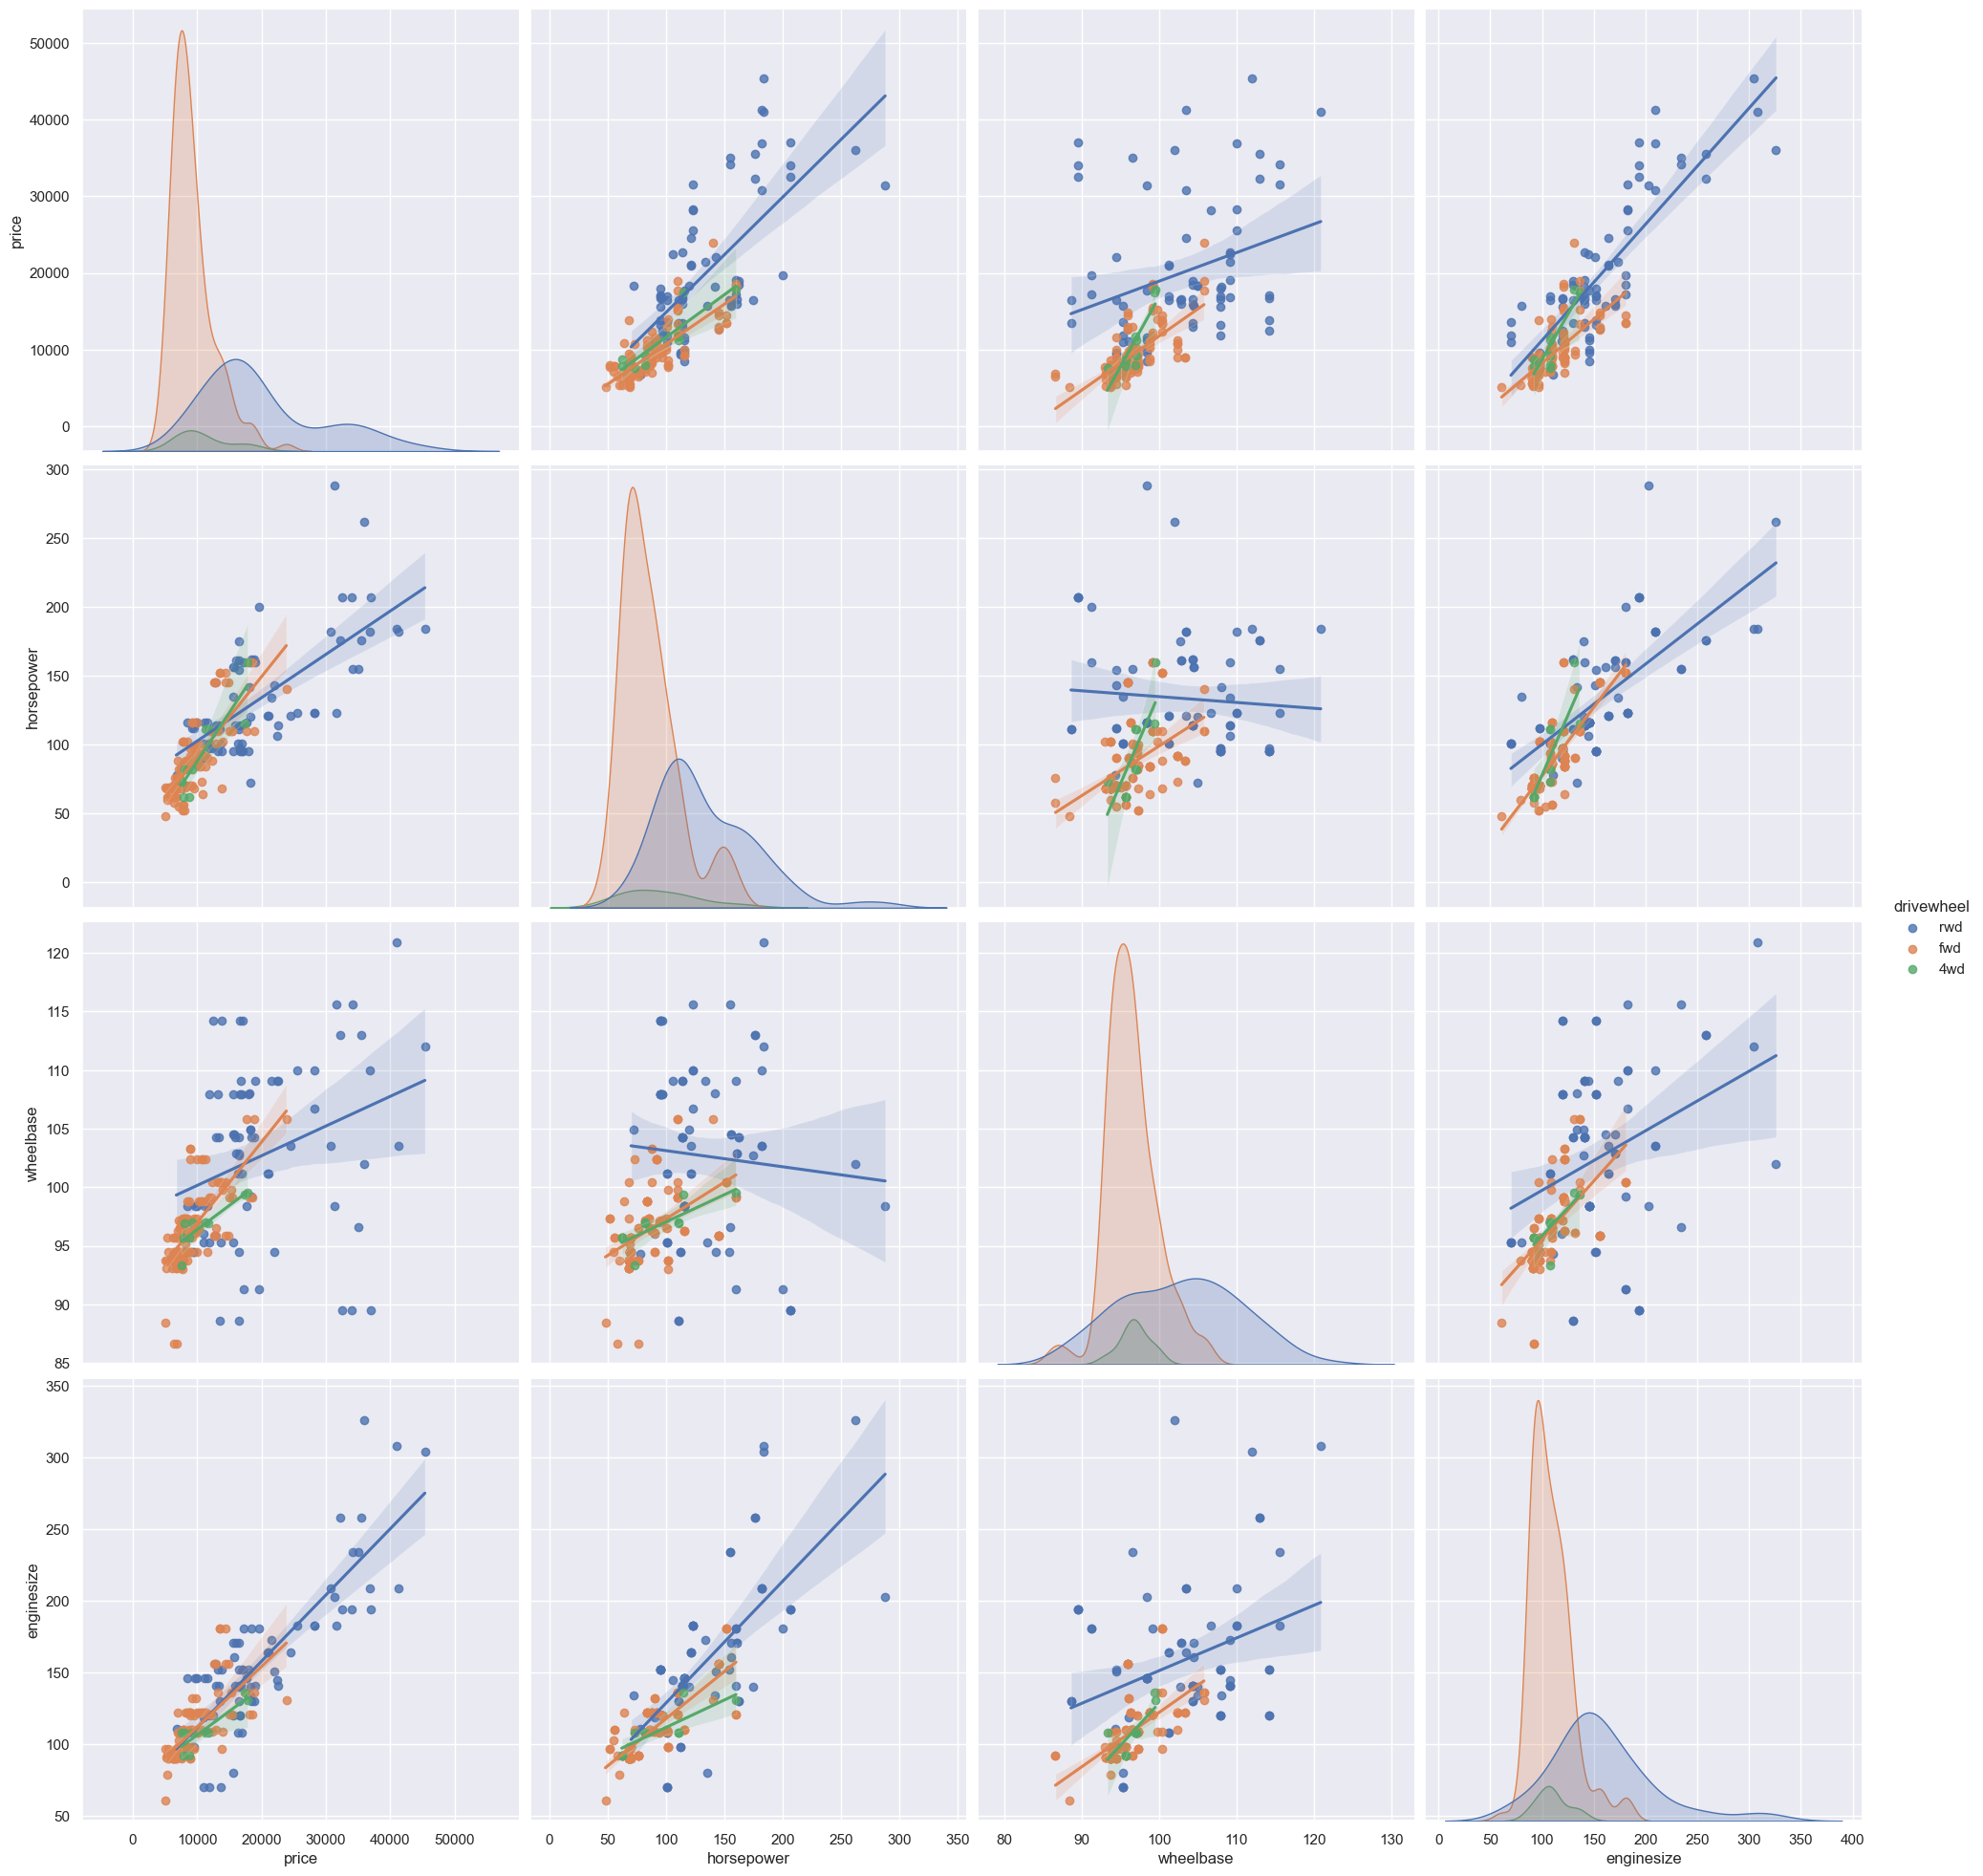

In [63]:
# Example 3: Visualize the data with seaborn pairplot - important features
# Adding a regression line
g = sns.pairplot(raw_data[['price', 'horsepower', 'wheelbase', 'enginesize', 'drivewheel']], hue='drivewheel', height=5, diag_kind='kde', kind='reg')

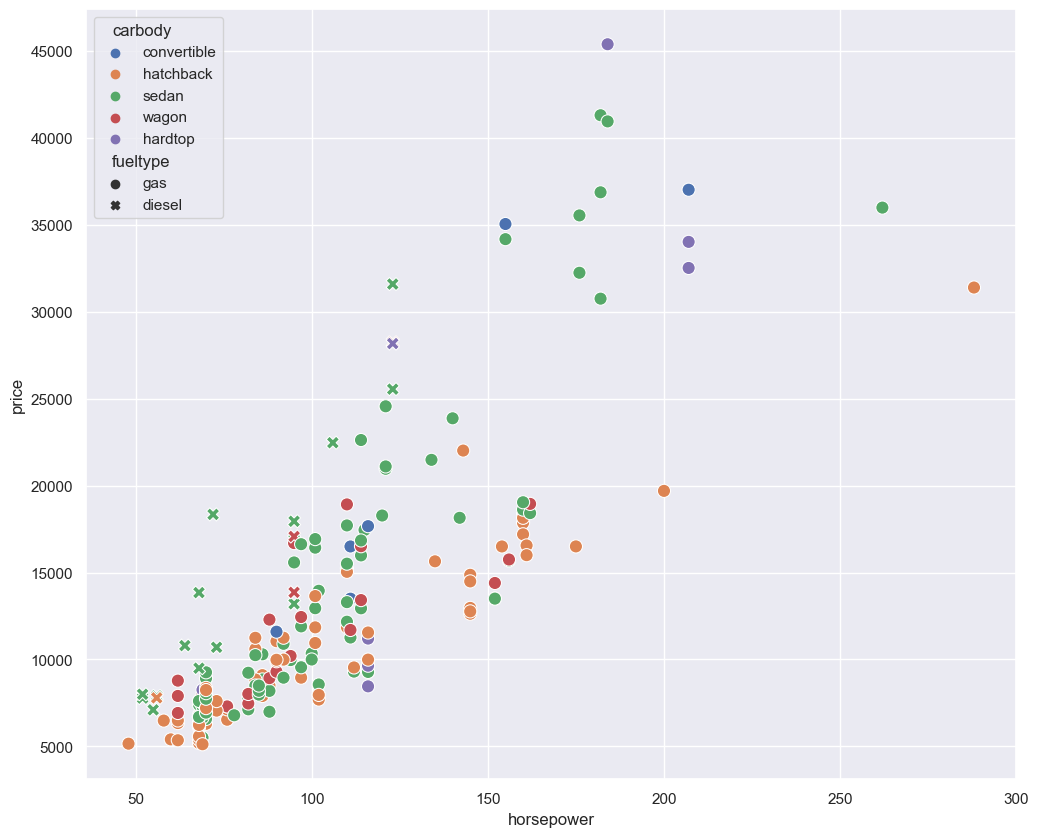

In [64]:
# Example 4: Visualize the relationship between price and horsepower by carbody

ax = sns.scatterplot(x='horsepower', y='price', data=raw_data, hue='carbody', style='fueltype', s=90)

3.4 Investigating categorical data

carbody    price
0  convertible 21890.50
1      hardtop 22208.50
2    hatchback 10376.65
3        sedan 14344.27
4        wagon 12371.96

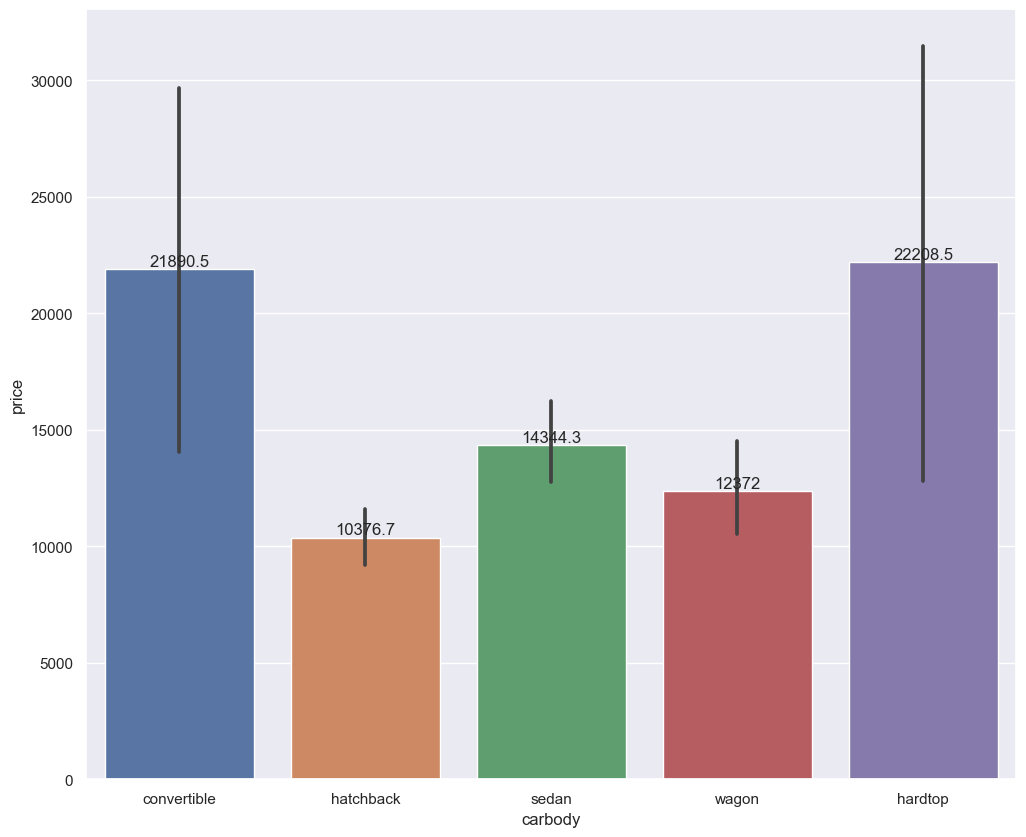

In [67]:
# Example 5: Average price by carbody

ax = sns.barplot(x='carbody', y='price', data=raw_data)
ax.bar_label(ax.containers[0])

# Notes:
# 1. the lines signify the confidence level
# 2. takes mean by default

raw_data[['carbody', 'price']].groupby('carbody', as_index=False).agg({ 'price': 'mean'})

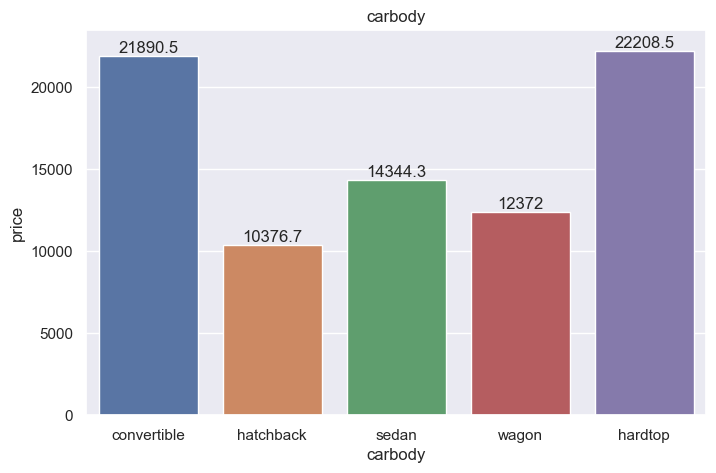

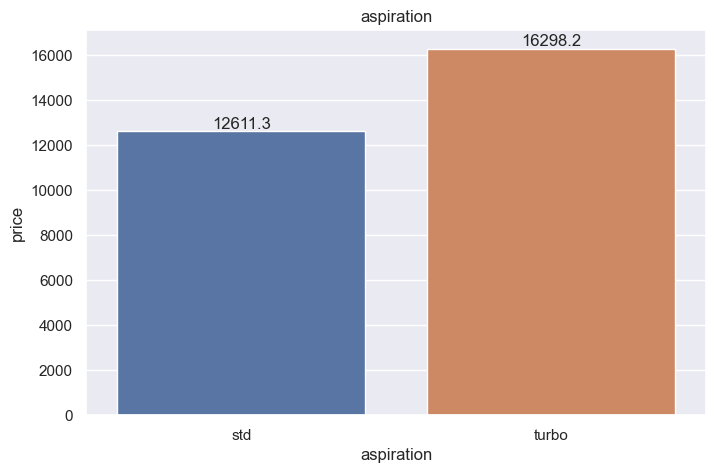

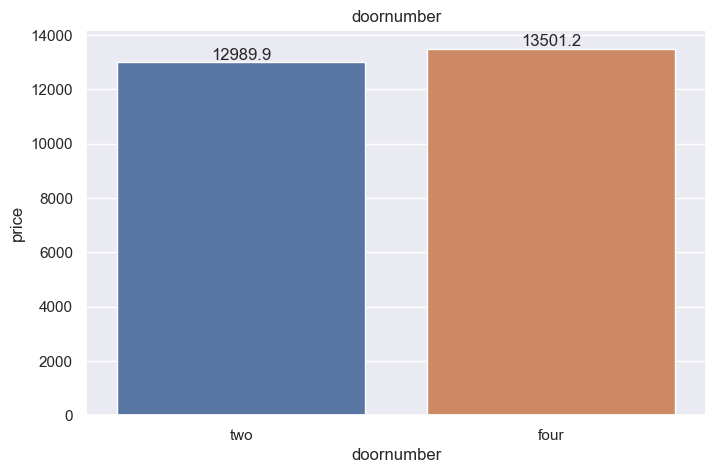

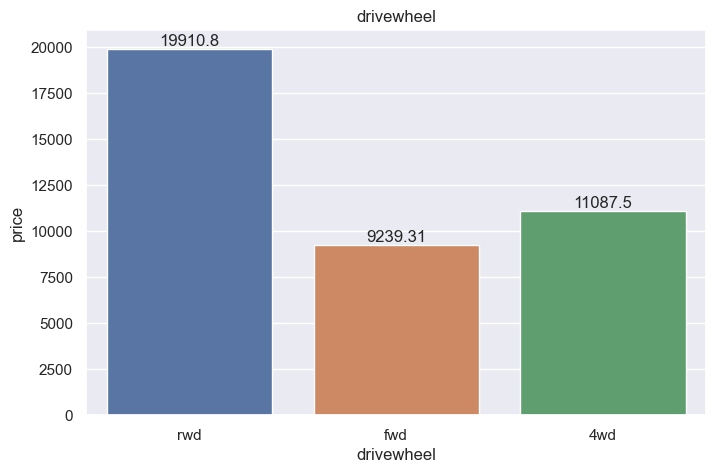

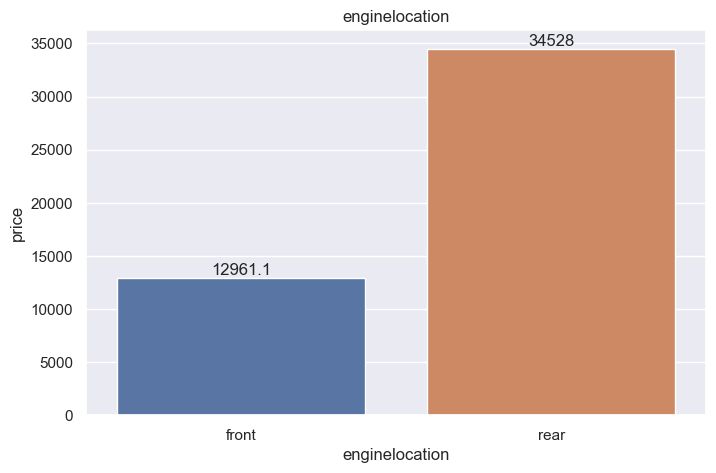

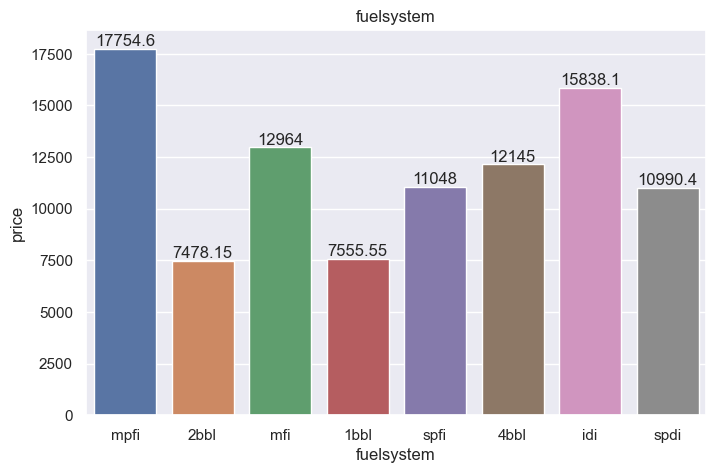

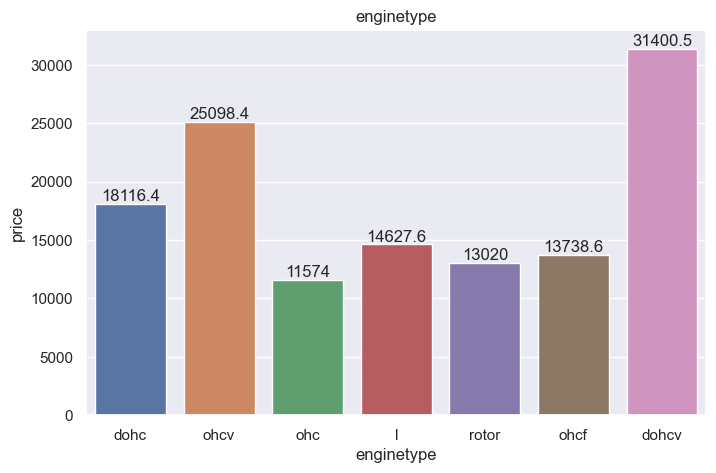

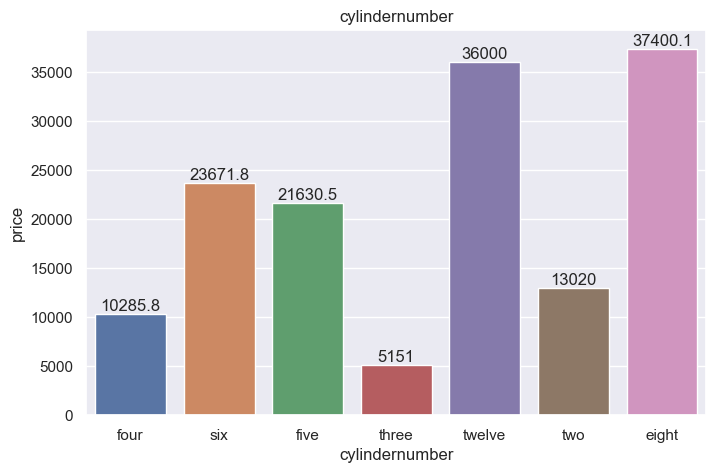

In [69]:
# Example 6: Average price of all categorical data

categories = ['carbody', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation', 'fuelsystem', 'enginetype', 'cylindernumber']

# Increase the size of the plot
sns.set(rc={'figure.figsize': (8,5)})

for c in categories:
  ax = sns.barplot(x=c, y='price', data=raw_data, ci=False)
  for container in ax.containers:
    ax.bar_label(ax.containers[0])

  plt.title(c)
  plt.show()

5.5 Investigate the distribution with disti plots

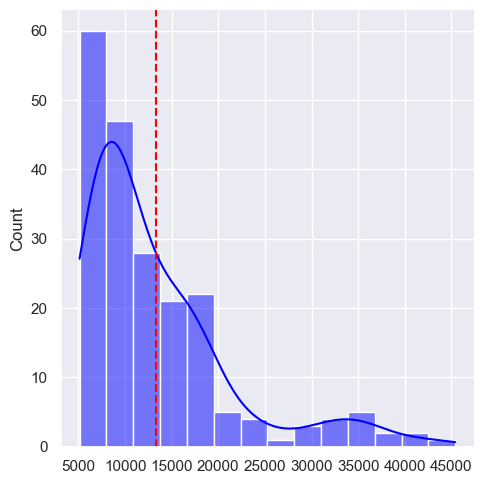

In [75]:
# Example 7: Investigate the distribution of price, adding the mean

x = raw_data['price'].values

sns.displot(x, color='blue', kde=True)

# Plot the mean
plt.axvline(x.mean(), 0, 1, color='red', linestyle='--', label='Mean')

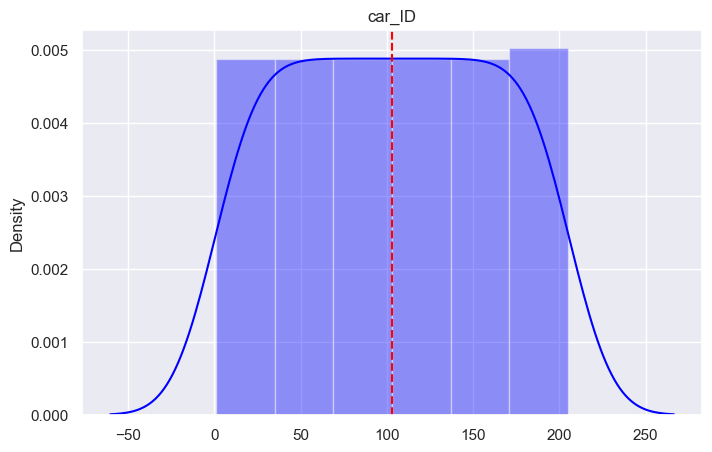

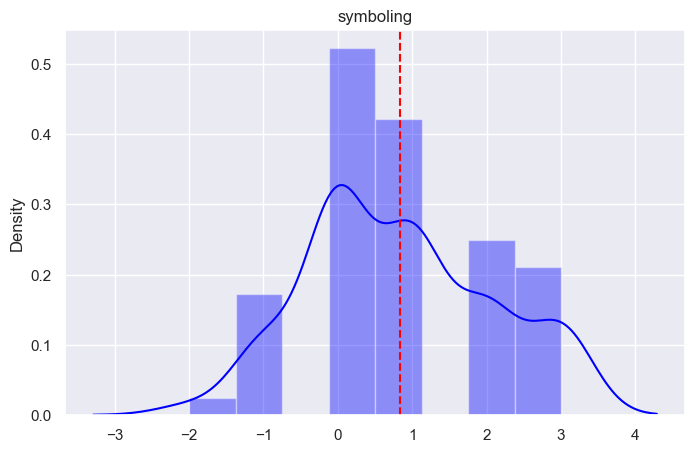

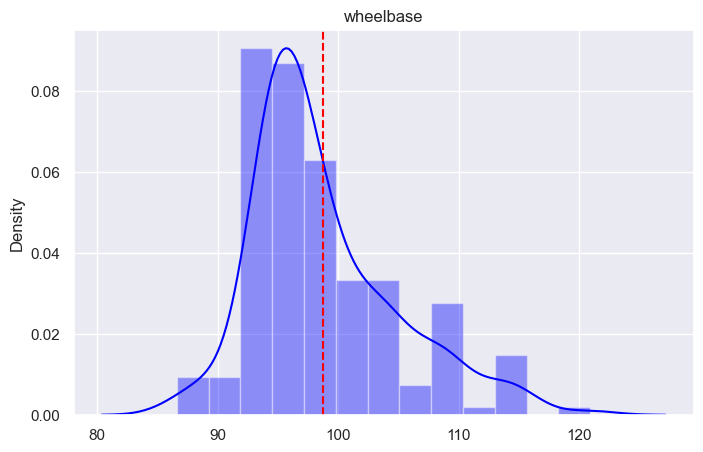

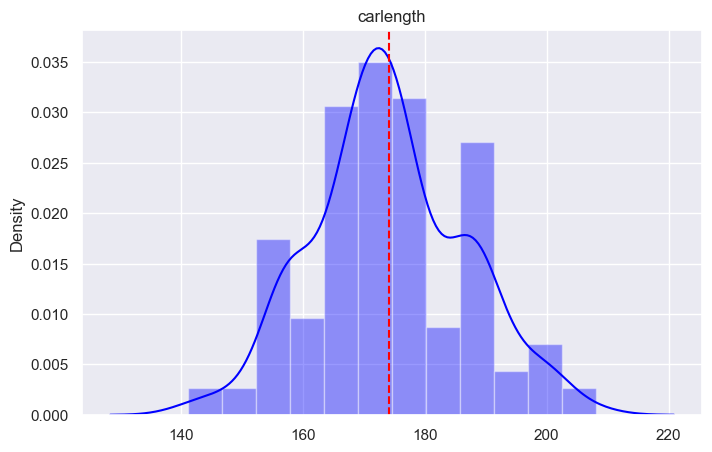

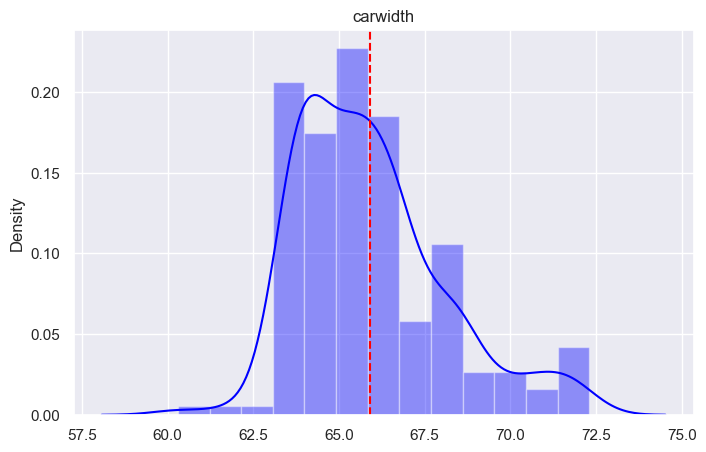

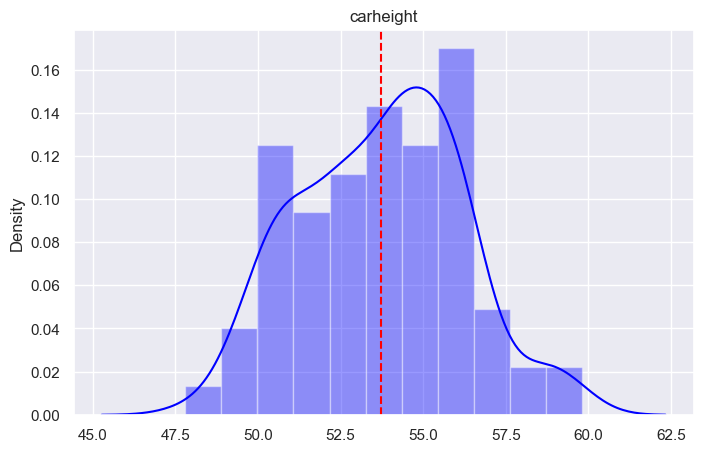

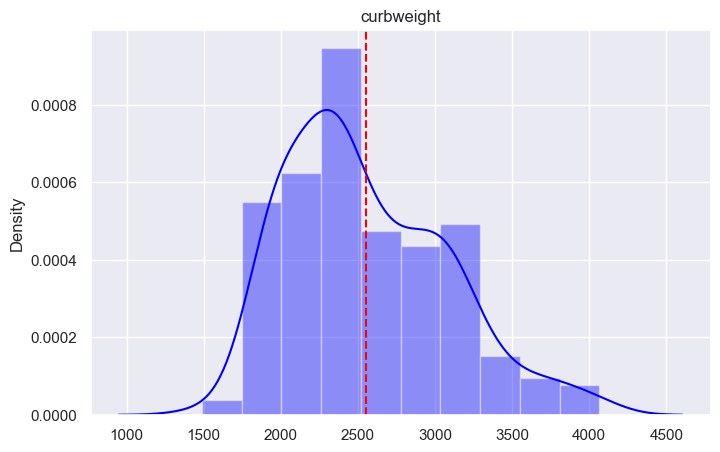

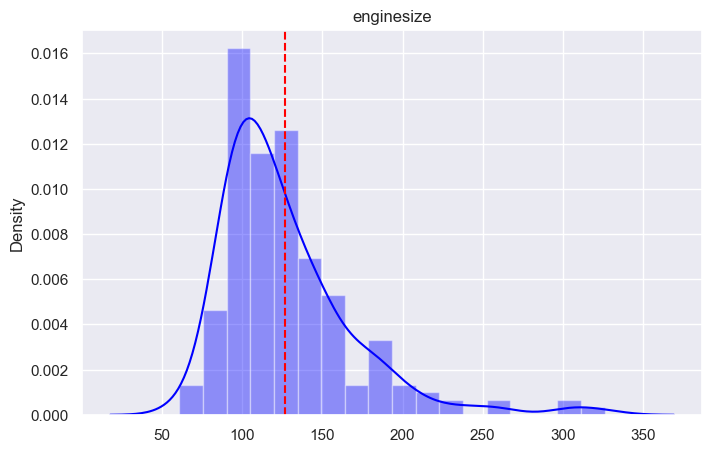

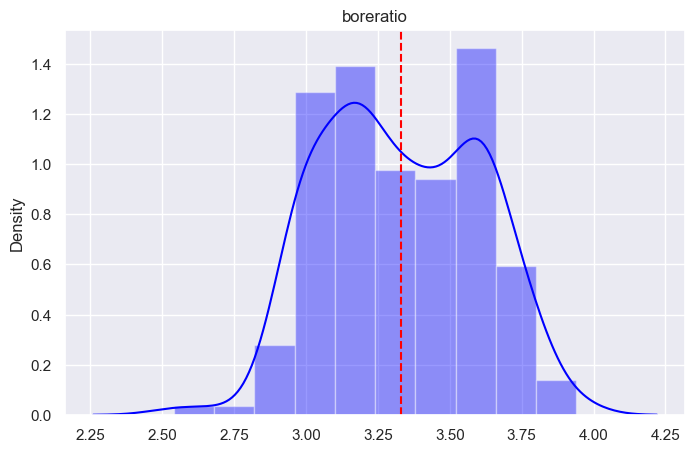

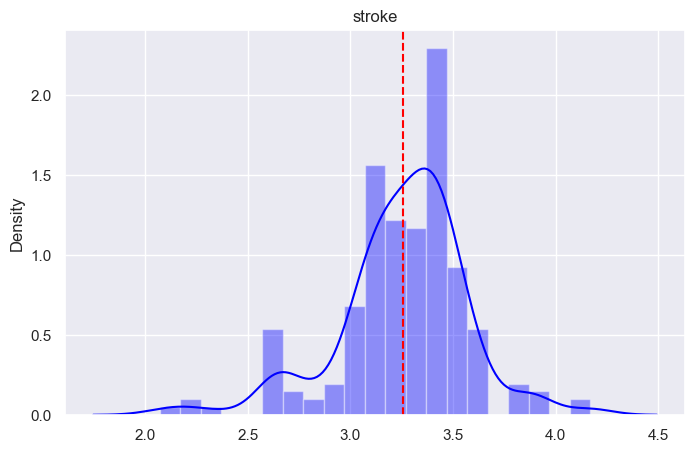

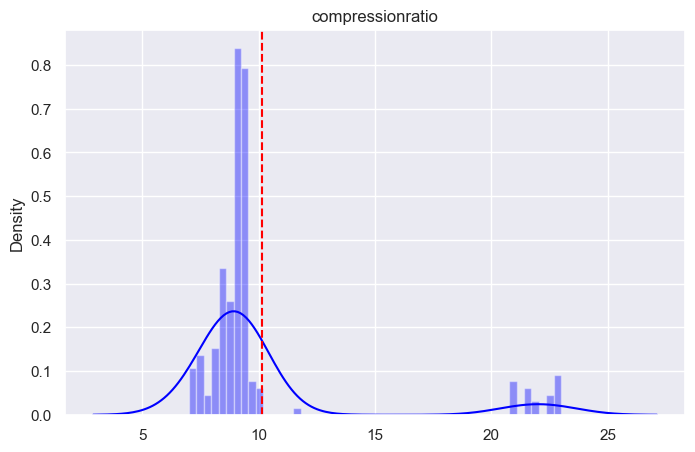

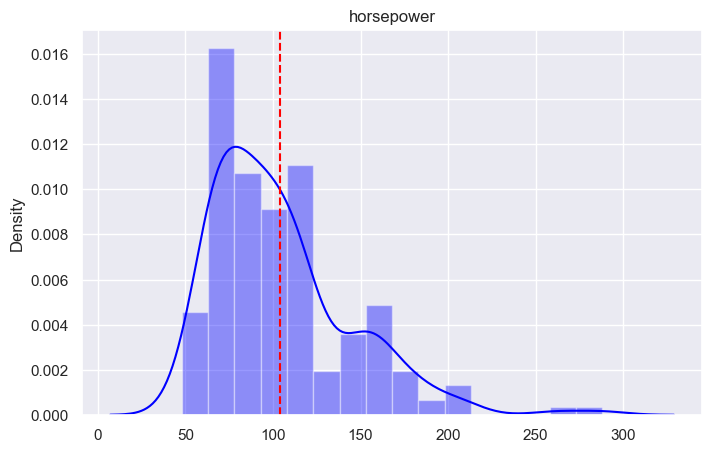

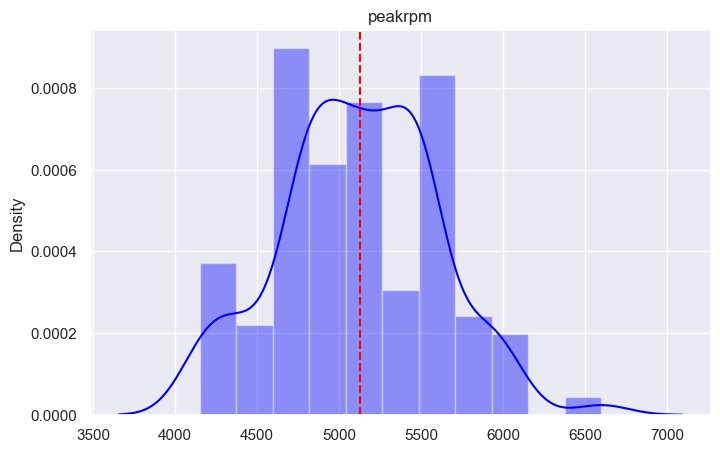

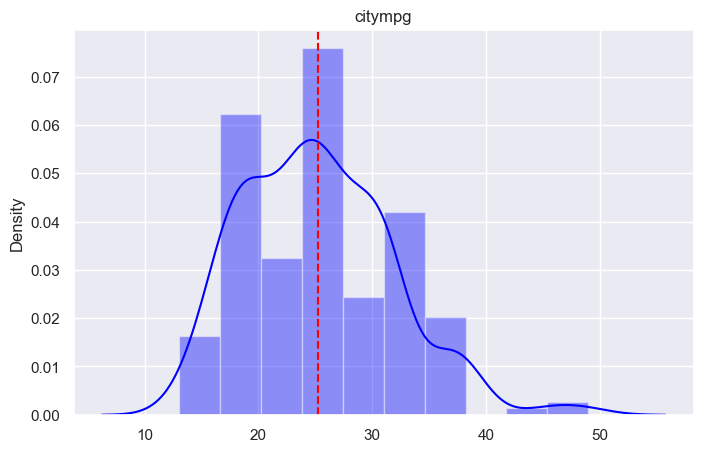

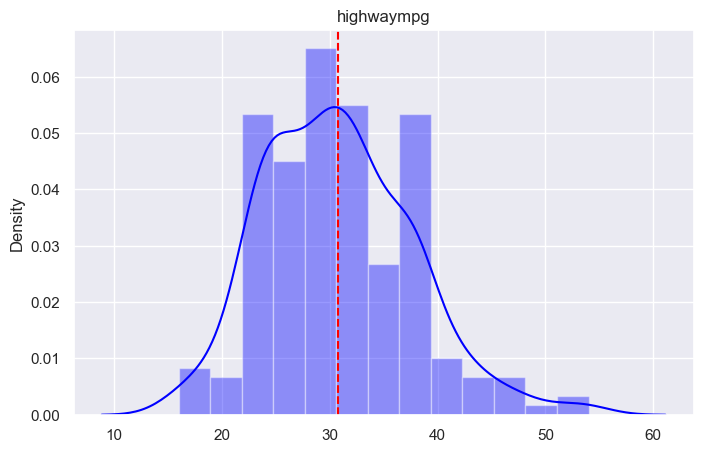

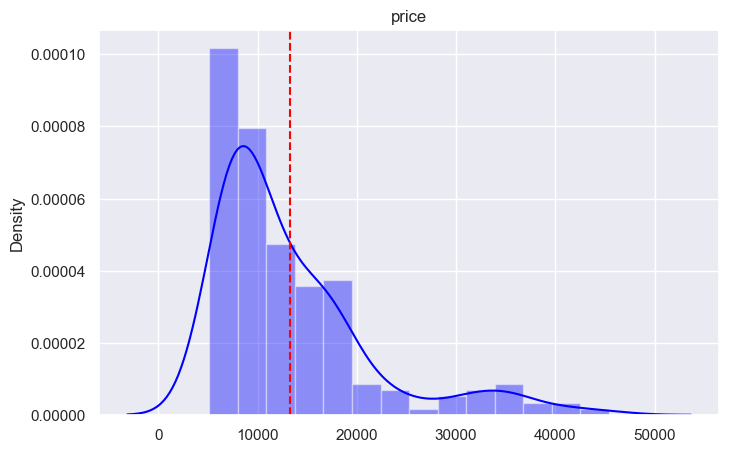

In [79]:
# Example 8: Investigate the distribution of all numerical data

# identify the numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
n_variables = raw_data.select_dtypes(include=numerics).columns

# Increase the size of the plot
sns.set(rc={'figure.figsize': (8,5)})

for n in n_variables:
  x = raw_data[n].values
  sns.distplot(x, color='blue')

  mean = raw_data[n].mean()
  # Plot the mean
  plt.axvline(mean, 0, 1, color='red', linestyle='--', label='Mean')
  plt.title(n)
  plt.show()

5.6 Investigating the distribution and outliers with Box plots

The median is:  10295.0


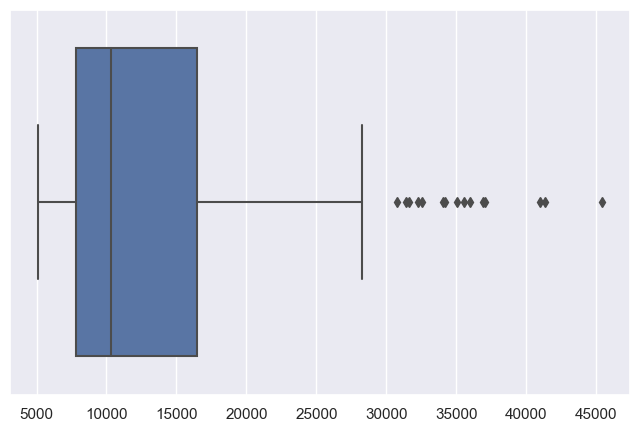

In [80]:
# Example 9: Investigate the distribution of price using boxplot

x = raw_data['price'].values
ax = sns.boxplot(x)

print('The median is: ', raw_data['price'].median())

# Notes:
# 1. The line signifies the median
# 2. The box represents the interquartile range (IQR). i.e the middle shows the beginning of Q1 (25th percentile) and the end of Q3 (75th percentile)
# 3. The whiskers (left - right) represent the minimum and maximum values
# 4. The dots represent the outliers

The median for car_ID is: 103.0


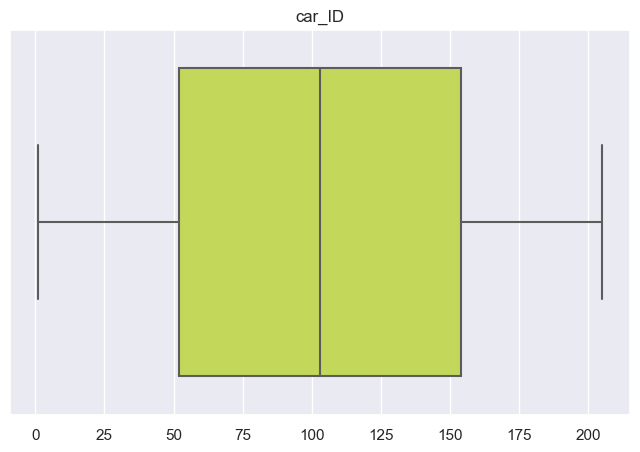

The median for symboling is: 1.0


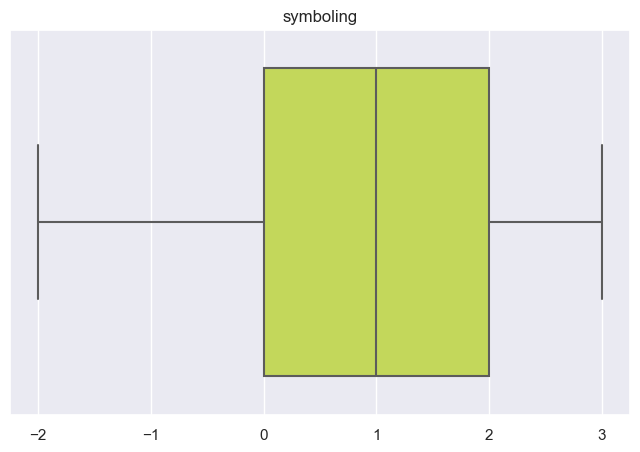

The median for wheelbase is: 97.0


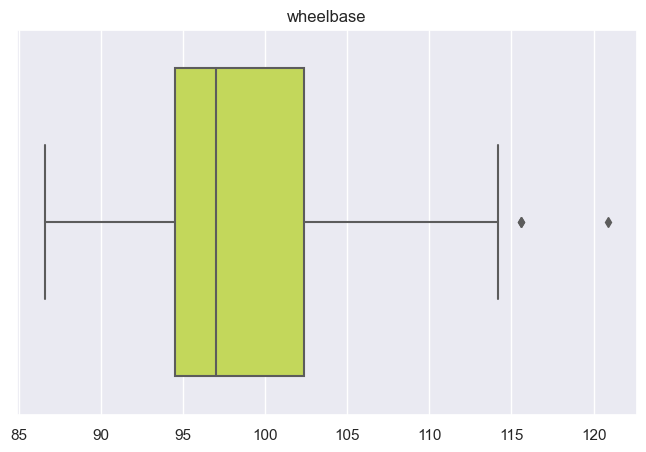

The median for carlength is: 173.2


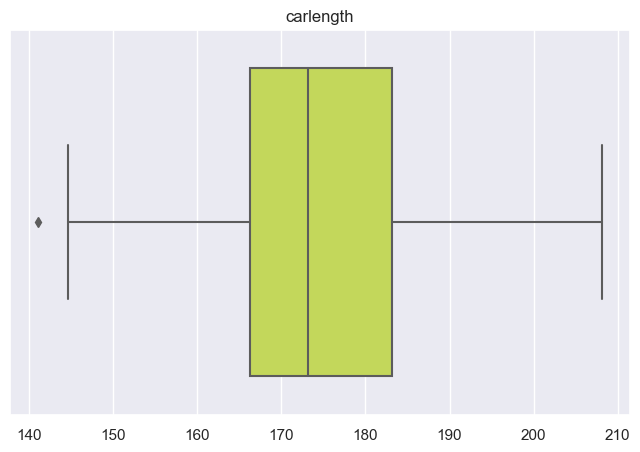

The median for carwidth is: 65.5


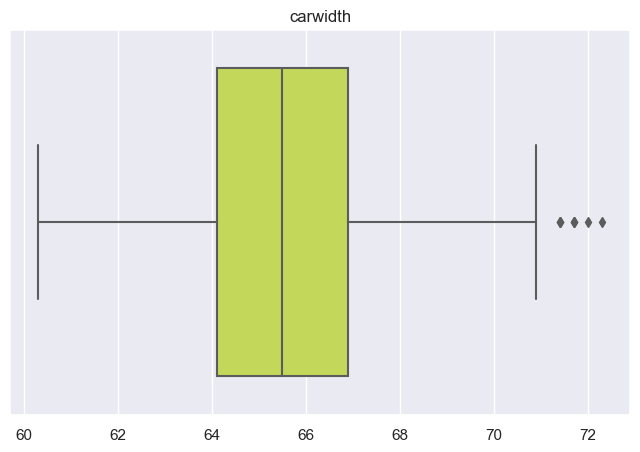

The median for carheight is: 54.1


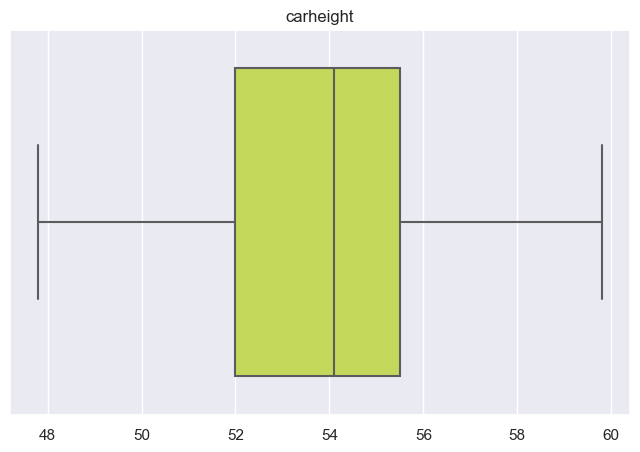

The median for curbweight is: 2414.0


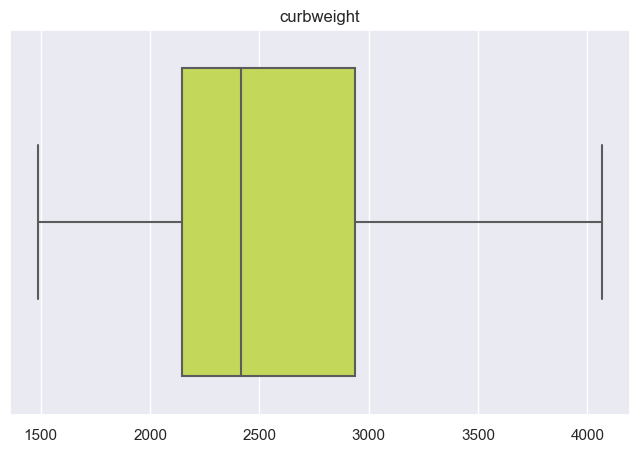

The median for enginesize is: 120.0


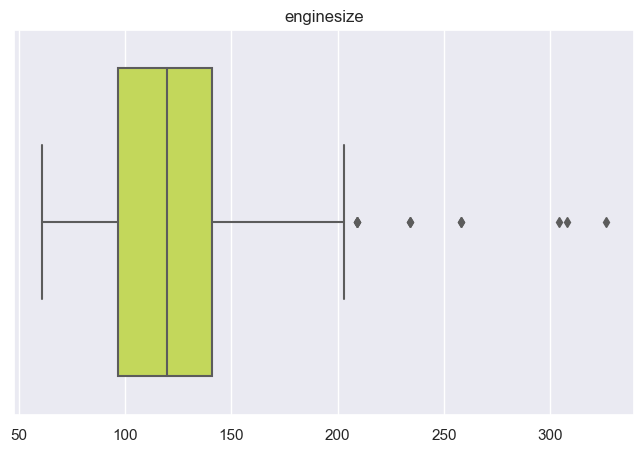

The median for boreratio is: 3.31


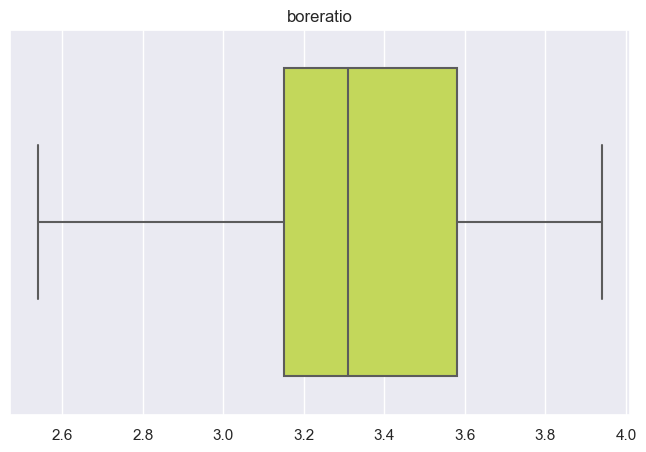

The median for stroke is: 3.29


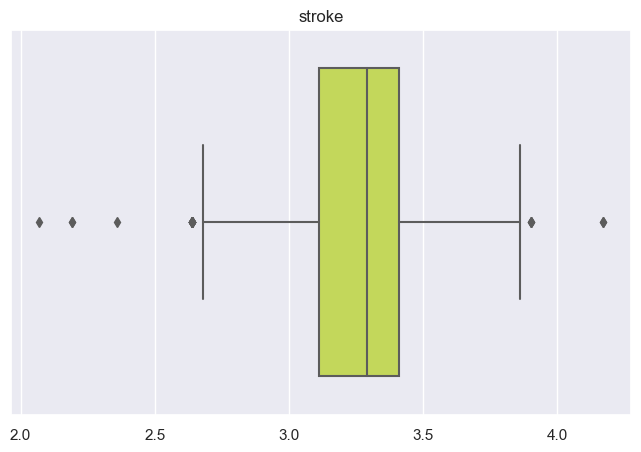

The median for compressionratio is: 9.0


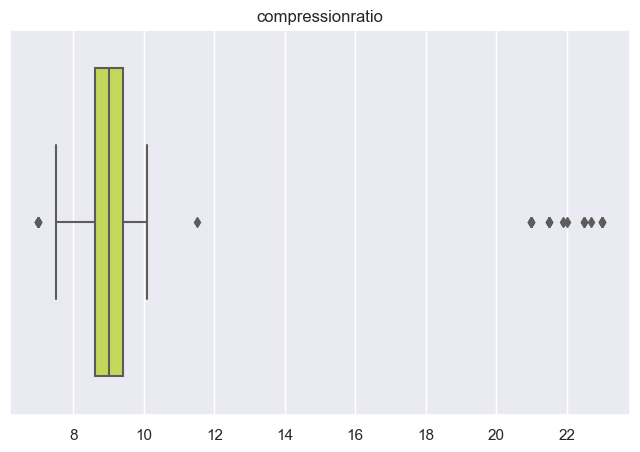

The median for horsepower is: 95.0


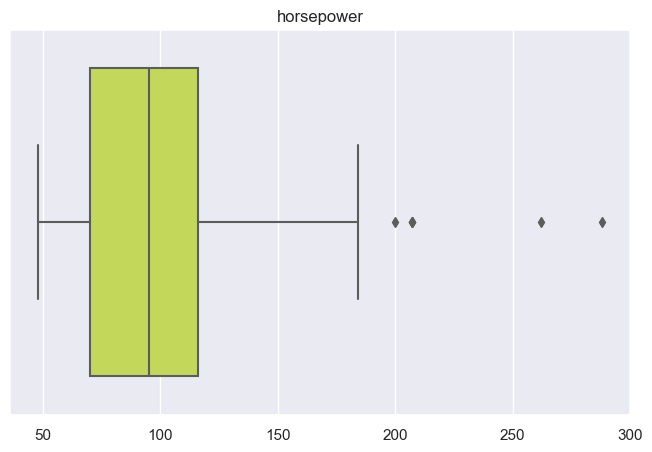

The median for peakrpm is: 5200.0


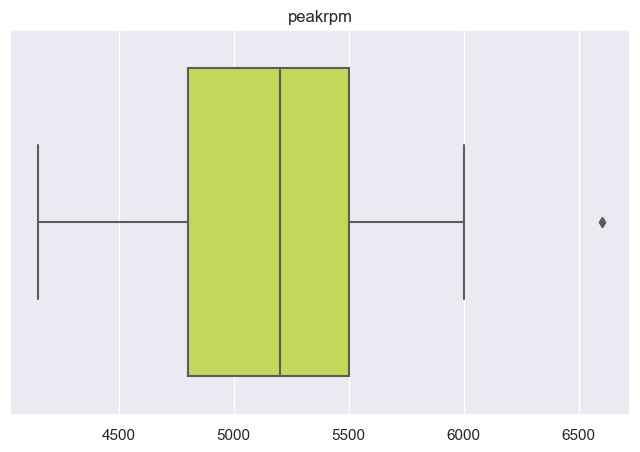

The median for citympg is: 24.0


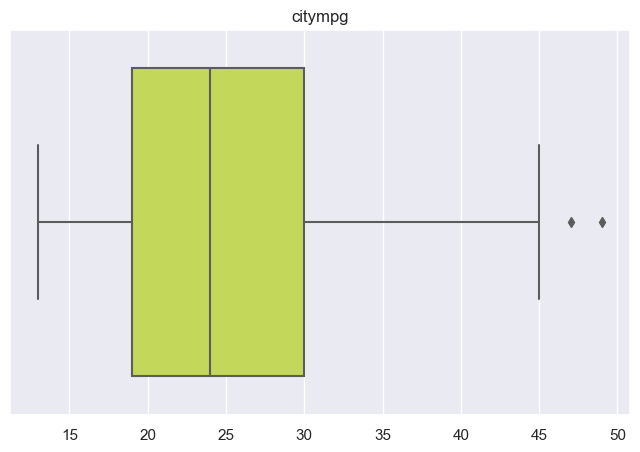

The median for highwaympg is: 30.0


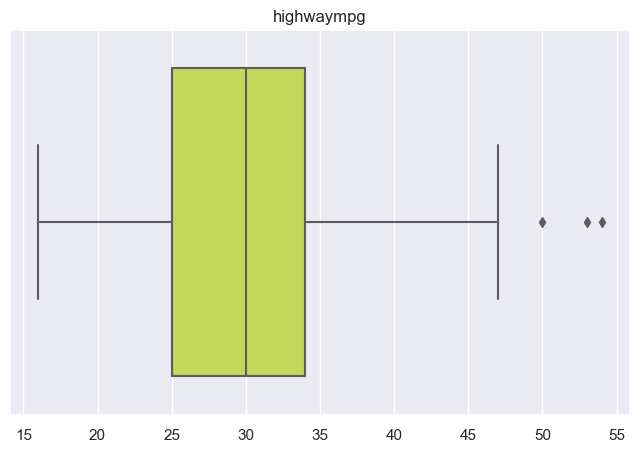

The median for price is: 10295.0


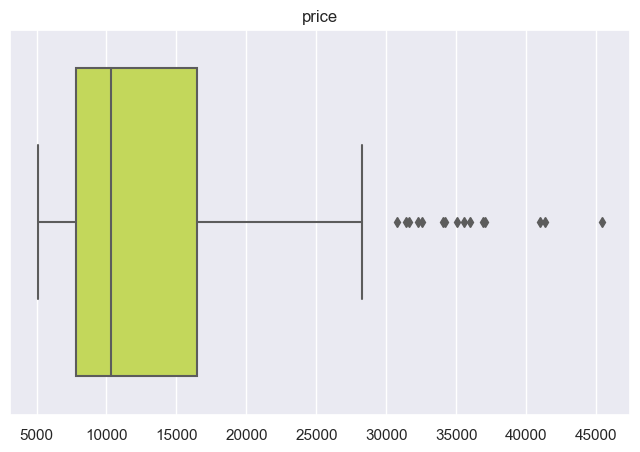

In [81]:
# Example 10: Investigate the distribution of all numerical data using boxplot

# Increase the size of the plot
sns.set(rc={'figure.figsize': (8,5)})

for n in n_variables:
  x = raw_data[n].values
  ax = sns.boxplot(x, color = '#D1EC46')
  print('The median for {} is: {}'.format(n, raw_data[n].median()))
  plt.title(n)
  plt.show()

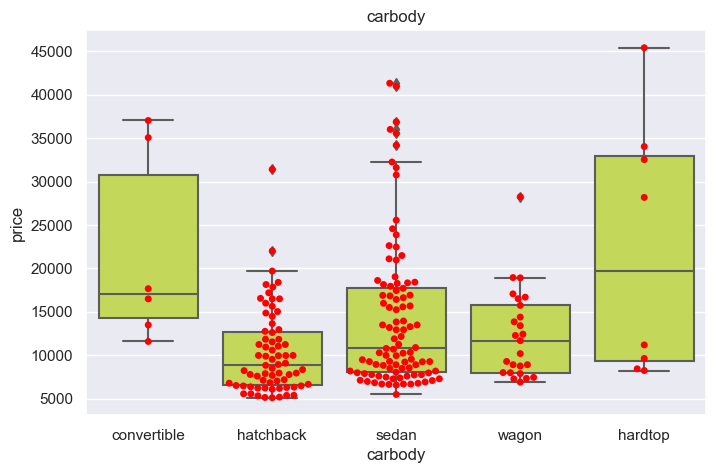

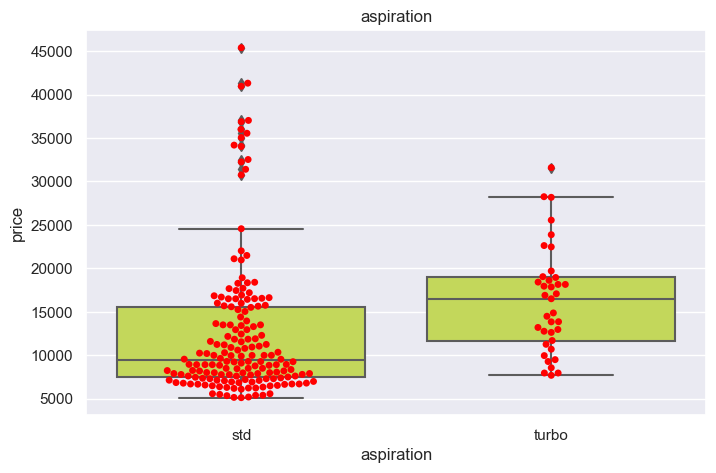

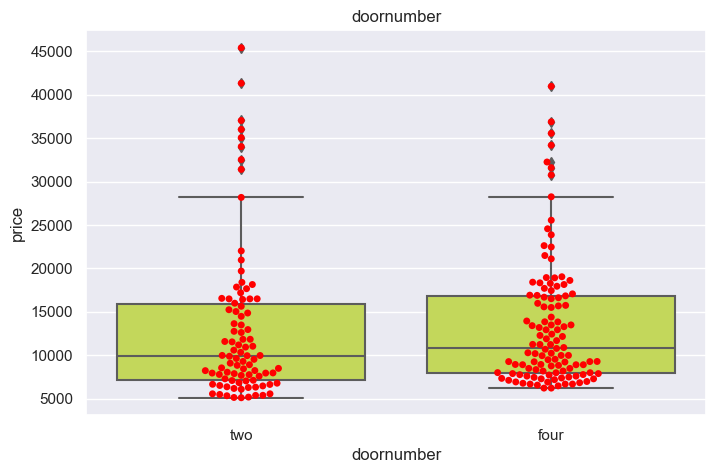

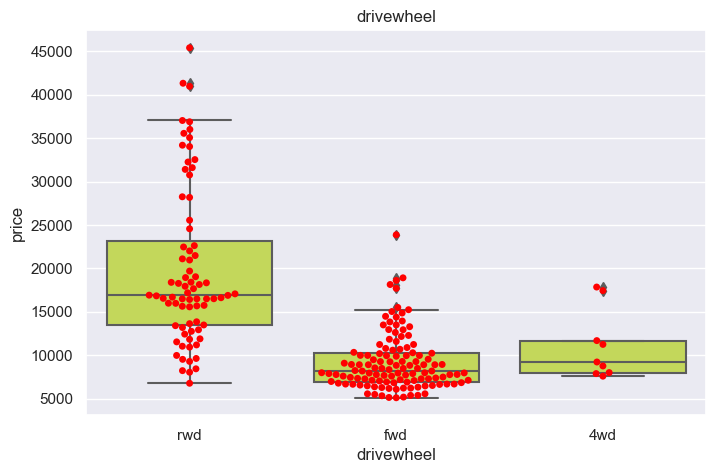

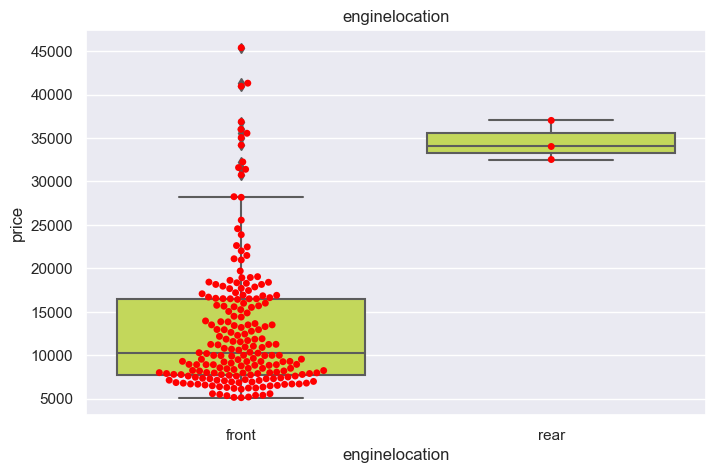

/Users/chisimdi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


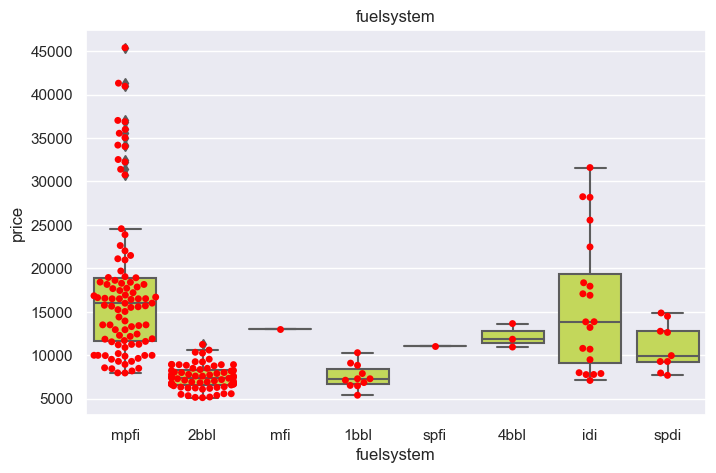

/Users/chisimdi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


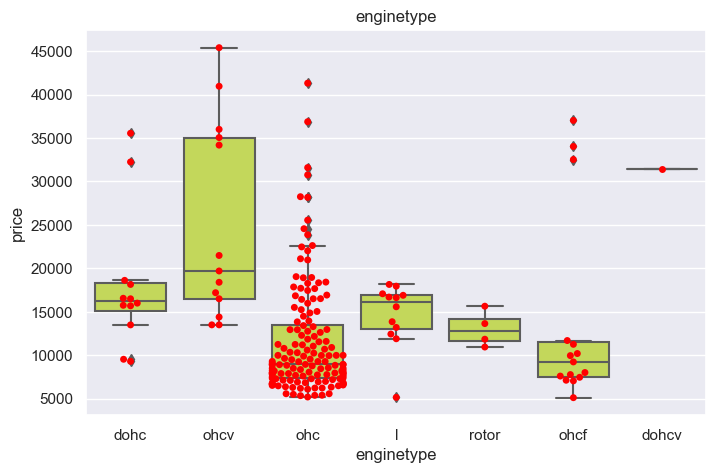

/Users/chisimdi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


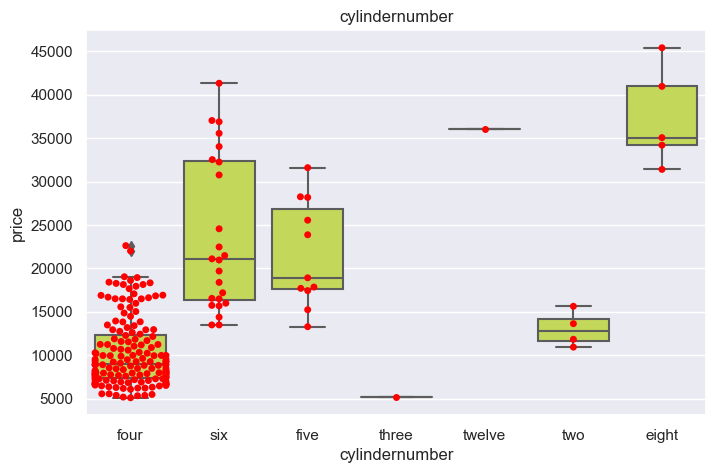

In [82]:
# Example 11: Investigate the distribution of price by categorical variables - by data points

categories = ['carbody', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation', 'fuelsystem', 'enginetype', 'cylindernumber']

# Increase the size of the plot
sns.set(rc={'figure.figsize': (8,5)})

for c in categories:
  ax = sns.boxplot(x=c, y='price', data=raw_data, color = '#D1EC46')
  ax = sns.swarmplot(x=c, y='price', data=raw_data, color = 'red')
  plt.title(c)
  plt.show()

3.7 Feature Engineering
- Converting the categorical values into numerical representation

In [83]:
raw_data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front      88.60     168.80     64.10   
1  convertible        rwd          front      88.60     168.80     64.10   
2    hatchback        rwd          front      94.50     171.20     65.50   
3        sedan        fwd          front      99.80     176.60     66.20   
4        sedan        4wd          front      99.40     176.60     66.40   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0      48.80        2548       dohc           four         130       mpfi   
1      48.80        2548       dohc           four         130       mpfi   
2      52.40        2823       ohcv            six         152       mpfi   
3      54.30        2337        ohc           four         109       mpfi   
4      54.30        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68              9.00         111     5000       21   
1       3.47    2.68              9.00         111     5000       21   
2       2.68    3.47              9.00         154     5000       19   
3       3.19    3.40             10.00         102     5500       24   
4       3.19    3.40              8.00         115     5500       18   

   highwaympg    price  
0          27 13495.00  
1          27 16500.00  
2          26 16500.00  
3          30 13950.00  
4          22 17450.00